In [69]:
import ast
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from simpletransformers.classification import ClassificationModel

In [82]:
plt.style.use('Solarize_Light2')

def get_image(path):
    return OffsetImage(plt.imread(path, format="png"), zoom=.25)

In [71]:
ARTICLE_PATH = "test-article.txt"
LABELS_TO_AUTHORS = {
    0: 'Sanna Ukkola',
    1: 'Timo Haapala',
    2: 'Lauri Nurmi',
    3: 'Marko Junkkari'
}

article_name = ARTICLE_PATH.split("/")[-1].split(".")[0]
df = pd.read_csv('article-data/article-data-with-raw-predictions.csv', index_col=0)
model = ClassificationModel("bert", "model-results/", use_cuda=False)

print("Model loaded.")

Model loaded.


In [72]:
with open('test-article.txt', encoding='utf8') as f:
    lines = f.readlines()
text = ' '.join(lines)
text = text.replace("\n", "")

In [68]:
# load and predict

prediction, raw_output = model.predict([text])
prediction = prediction[0]
raw_output = raw_output[0]

print(f'Text matches best with: {LABELS_TO_AUTHORS.get(prediction)}')
print(f'Raw output: {raw_output}')

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Text matches best with: Marko Junkkari
Raw output: [-2.96275067  0.11846653 -1.19843221  3.49551582]


Since there are four different authors, the raw output has four dimensions. In order to visualize result in 2-dimenion space, let's use PCA to reduce number of dimensions.

In [74]:
xs = list(df["raw-predictions"].apply(ast.literal_eval))
ys = list(df['label'])

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(xs + [raw_output])
df_2d = pd.DataFrame(data = principalComponents, columns=['x', 'y'])
df_2d['author'] = [LABELS_TO_AUTHORS[y] for y in ys] + ['X']

Plot saved to test-article.png


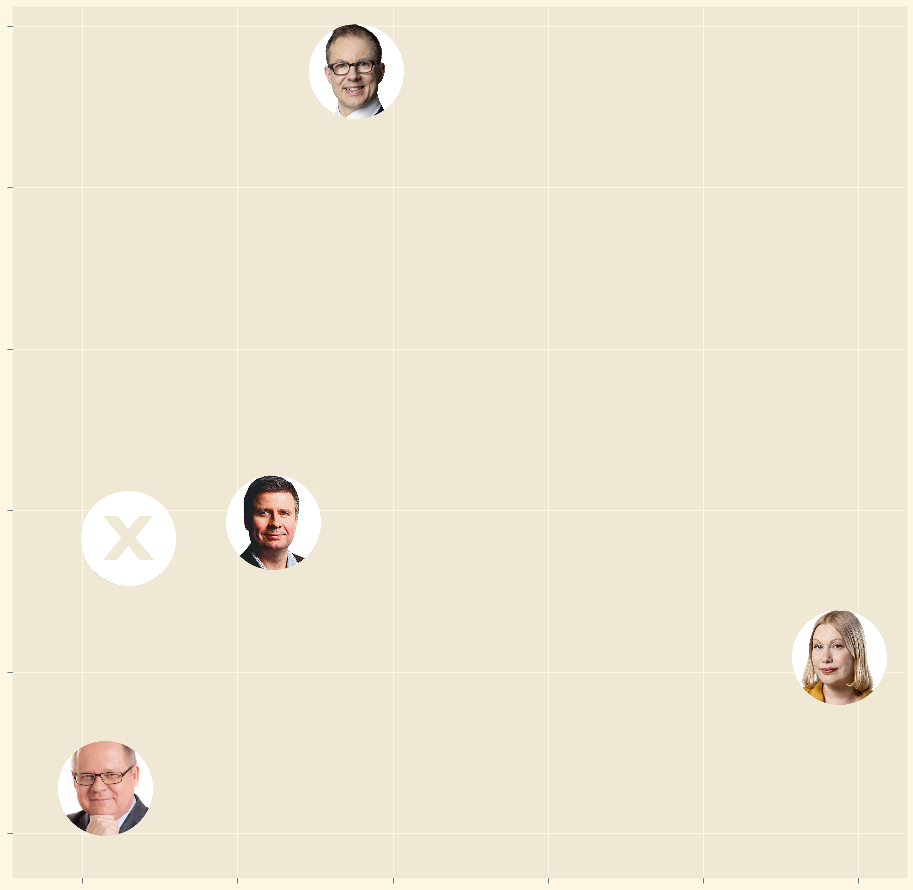

In [83]:
# plot result

author_positions = {
    author: (
        np.mean(df_2d[df_2d['author'] == author].x),
        np.mean(df_2d[df_2d['author'] == author].y)
    )
    for author in set(df_2d.author)
}

fig, ax = plt.subplots(figsize=(16,16))

for author in set(df_2d.author):
    _df = df_2d[df_2d['author'] == author]
    _xs = list(_df.x)
    _ys = list(_df.y)
    plt.scatter(_xs, _ys, label=author, alpha=0.0)
    ab = AnnotationBbox(
        get_image(f'imgs/{author.split(" ")[-1].lower()}.png'),
        author_positions.get(author),
        frameon=False
    )
    ax.add_artist(ab)
    
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.savefig(f"{article_name}.png")

print(f"Plot saved to {article_name}.png")